In [1]:
library(cluster)
library(plotly)
library(GGally)
library(dendextend)
library(palmerpenguins)
library(dplyr)
library(cluster)
library(caret)
library(mclust)

Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is m

In [2]:
penguins <- read.csv("./data/penguins.csv") %>% select(-X)

In [3]:
penguins <- na.omit(penguins)
logpenguins <- log(penguins[,3:6])
logpenguins$species <- penguins$species
summary(penguins)

   species             island          bill_length_mm  bill_depth_mm  
 Length:333         Length:333         Min.   :32.10   Min.   :13.10  
 Class :character   Class :character   1st Qu.:39.50   1st Qu.:15.60  
 Mode  :character   Mode  :character   Median :44.50   Median :17.30  
                                       Mean   :43.99   Mean   :17.16  
                                       3rd Qu.:48.60   3rd Qu.:18.70  
                                       Max.   :59.60   Max.   :21.50  
 flipper_length_mm  body_mass_g       sex                 year     
 Min.   :172       Min.   :2700   Length:333         Min.   :2007  
 1st Qu.:190       1st Qu.:3550   Class :character   1st Qu.:2007  
 Median :197       Median :4050   Mode  :character   Median :2008  
 Mean   :201       Mean   :4207                      Mean   :2008  
 3rd Qu.:213       3rd Qu.:4775                      3rd Qu.:2009  
 Max.   :231       Max.   :6300                      Max.   :2009  

In [4]:
logpenguins %>% 
group_by(species) %>% 
summarize(
    mean(bill_length_mm), 
    mean(bill_depth_mm), 
    mean(flipper_length_mm),
    mean(body_mass_g)
)

species,mean(bill_length_mm),mean(bill_depth_mm),mean(flipper_length_mm),mean(body_mass_g)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Adelie,3.656704,2.907303,5.246980,8.210187
Chinstrap,3.886095,2.911590,5.276559,8.219760
Gentoo,3.860086,2.705700,5.380528,8.530666


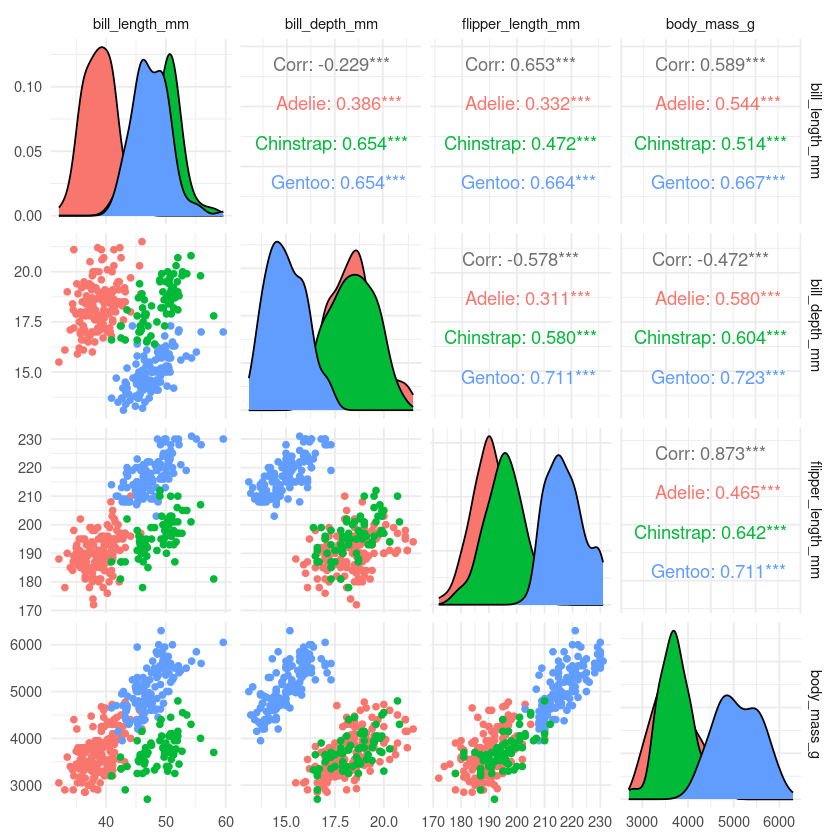

In [5]:
p <- ggpairs(penguins, columns = 3:6, aes(color = species)) + theme_minimal()
p

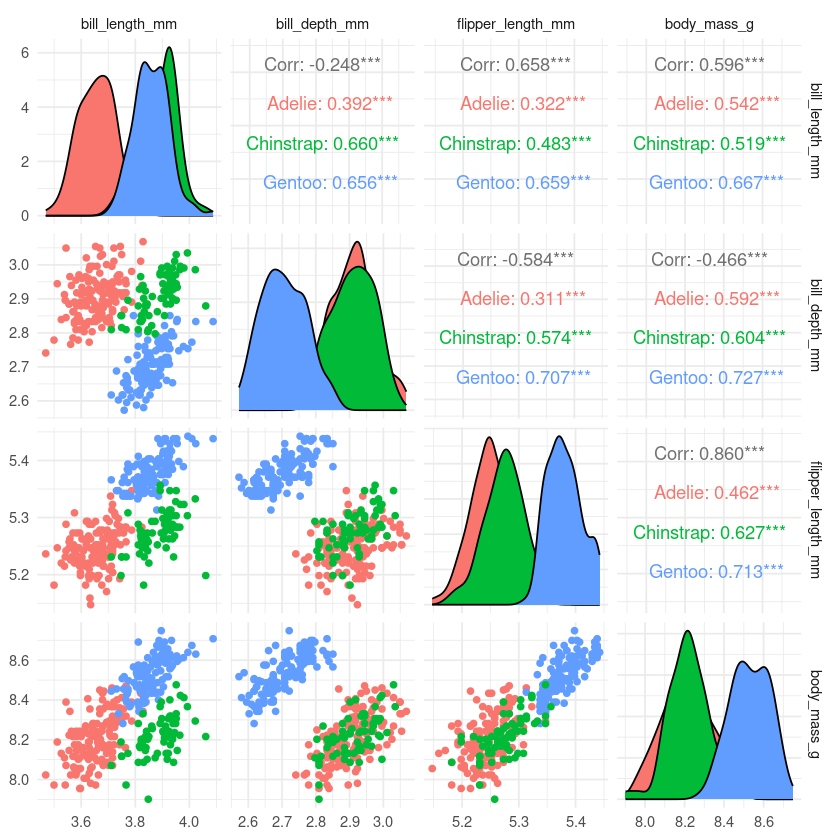

In [6]:
p <- ggpairs(logpenguins, columns = 1:4, aes(color = species)) + theme_minimal()
p

# Applying the agglomerative clustering algorithm 

In [7]:
ac <- agnes(logpenguins[, 1:4], method = "complete")

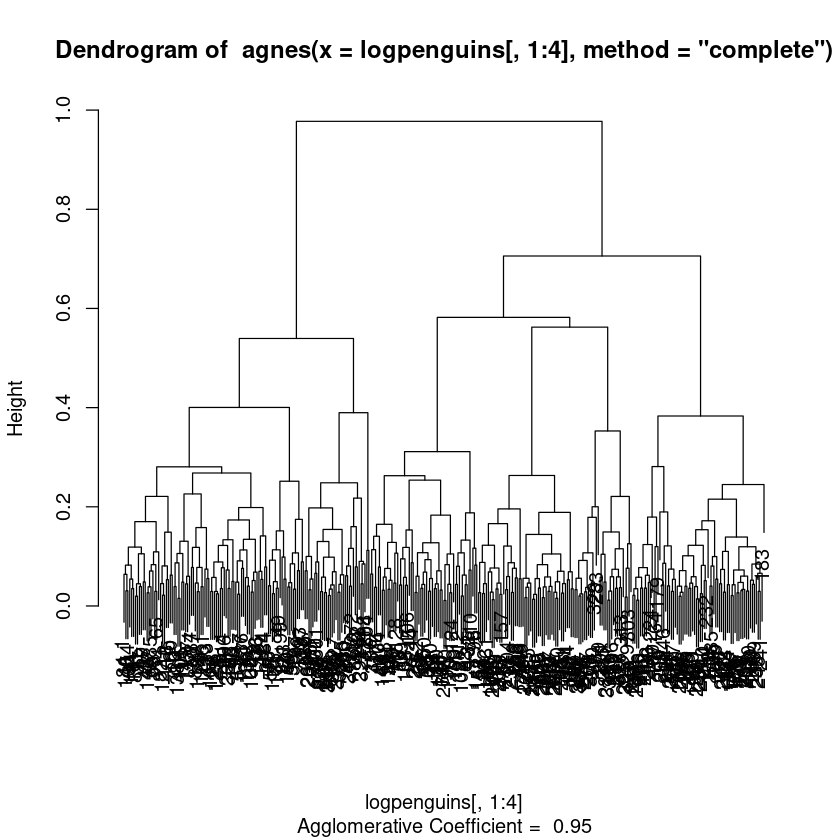

In [8]:
plot(ac, which.plots = 2)

In [9]:
labels <- cutree(ac, h = 0.6)

# There is room for improvement in the labelling

In [10]:
labels <- labels %>% as.vector() %>% as.character()

In [11]:
labels <- replace(labels, labels == "1", "Adelie")
labels <- replace(labels, labels == "3", "Gentoo")
labels <- replace(labels, labels == "2", "Chinstrap") %>% as.factor()
as.numeric(labels)

[1] 1 1 1 1 1 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 1 1 2 1 2
 [38] 1 2 1 2 1 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 [75] 1 2 1 2 1 1 1 1 2 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 2 2 1
[112] 2 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 2 3
[149] 2 3 3 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 2 2 3 2 3 3 2 3 3 2 3 3 3 3 2 3 2 3
[186] 2 3 2 3 3 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 2 3 2 3 3 3 2 3 2 3
[223] 2 3 2 3 2 3 2 3 2 3 2 3 3 3 2 3 2 3 3 2 2 3 3 3 3 3 3 2 3 2 3 3 3 2 3 2 3
[260] 3 2 2 3 3 3 1 2 2 1 2 1 1 1 2 2 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1
[297] 2 1 2 2 1 1 2 1 2 2 1 2 1 1 2 1 2 1 1 1 2 1 2 1 1 1 2 2 1 2 1 1 2 1 1 2 2

In [12]:
confusionMatrix(labels, reference = logpenguins$species)

ERROR: Error: `data` and `reference` should be factors with the same levels.


# k-means clustering

In [ ]:
kc <- clara(logpenguins[,1:4], k=3)

In [ ]:
plot(kc)

In [ ]:
summary(kc)

In [ ]:
labels <- kc$clustering

labels <- labels %>% as.vector() %>% as.character()
labels <- replace(labels, labels == "1", "Adelie")
labels <- replace(labels, labels == "3", "Gentoo")
labels <- replace(labels, labels == "2", "Chinstrap") %>% as.factor()
as.numeric(labels)

In [ ]:
confusionMatrix(labels, reference = logpenguins$species)

# Gaussian mixture models

In [ ]:
model <- Mclust(logpenguins[, 1:4], G = 3)

In [ ]:
plot(model)

In [ ]:
model$parameters$mean

In [ ]:
model$parameters$variance$sigma[,,1]

In [ ]:
labels <- model$classification

labels <- labels %>% as.vector() %>% as.character()
labels <- replace(labels, labels == "1", "Adelie")
labels <- replace(labels, labels == "3", "Gentoo")
labels <- replace(labels, labels == "2", "Chinstrap") %>% as.factor()
as.numeric(labels)

In [ ]:
confusionMatrix(labels, reference = logpenguins$species)